<a href="https://colab.research.google.com/github/Sim98B/MushroomVision/blob/main/MushD4/MushDetector4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Detector

https://www.youtube.com/watch?v=vT8_oE91R-w

## Setup

In [55]:
# Importing main libraries
try:
  import torch
  import torchvision
  import torchinfo
except:
  print("[INFO] Torch and Torchvision not installed, downloading")
  !pip install -q torch torchvision torchinfo
import torch
print(f"torch: {torch.__version__}")
import torchvision
print(f"torchvision: {torchvision.__version__}")
import torchinfo
print(f"torchinfo: {torchinfo.__version__}")

# Utilities
import os
from pathlib import Path
import requests
import shutil
from timeit import default_timer as timer
import itertools
import warnings
warnings.filterwarnings("ignore")

# Manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Neural networks
from torch import nn
from torchvision import transforms
import torchvision.models
from torchinfo import summary

# Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Cloning GitHub repository
!git clone https://github.com/Sim98B/MushroomVision
!mv MushroomVision/Modules/Libraries .
!mv MushroomVision/MV4/Models .

# Custom functions
from Libraries import data, extractors, model_ops, utils

shutil.rmtree("MushroomVision")

torch: 2.1.0+cu118
torchvision: 0.16.0+cu118
torchinfo: 1.8.0
Cloning into 'MushroomVision'...
remote: Enumerating objects: 64188, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 64188 (delta 100), reused 90 (delta 63), pack-reused 64041
Receiving objects: 100% (64188/64188), 800.30 MiB | 19.41 MiB/s, done.
Resolving deltas: 100% (1062/1062), done.
Updating files: 100% (1740/1740), done.
mv: cannot move 'MushroomVision/Modules/Libraries' to './Libraries': Directory not empty
mv: cannot move 'MushroomVision/MV4/Models' to './Models': Directory not empty


In [56]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
print(f'GPU name: {torch.cuda.get_device_name()}\n')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device is: {device}\n')
print(f'Total number of GPUs: {torch.cuda.device_count()}')

RuntimeError: ignored

In [57]:
model, transform = extractors.create_model(model_name = "efficientnet_v2l", output_shape = 100)

In [58]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

In [59]:
train_dataset = torchvision.datasets.CIFAR100(root = './data_src', train=True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR100(root = './data_src', train=False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [60]:
print(len(train_dataset))
print(len(test_dataset))

50000
10000


In [61]:
print(train_dataset.data.shape)
print(test_dataset.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [62]:
classes = train_dataset.classes

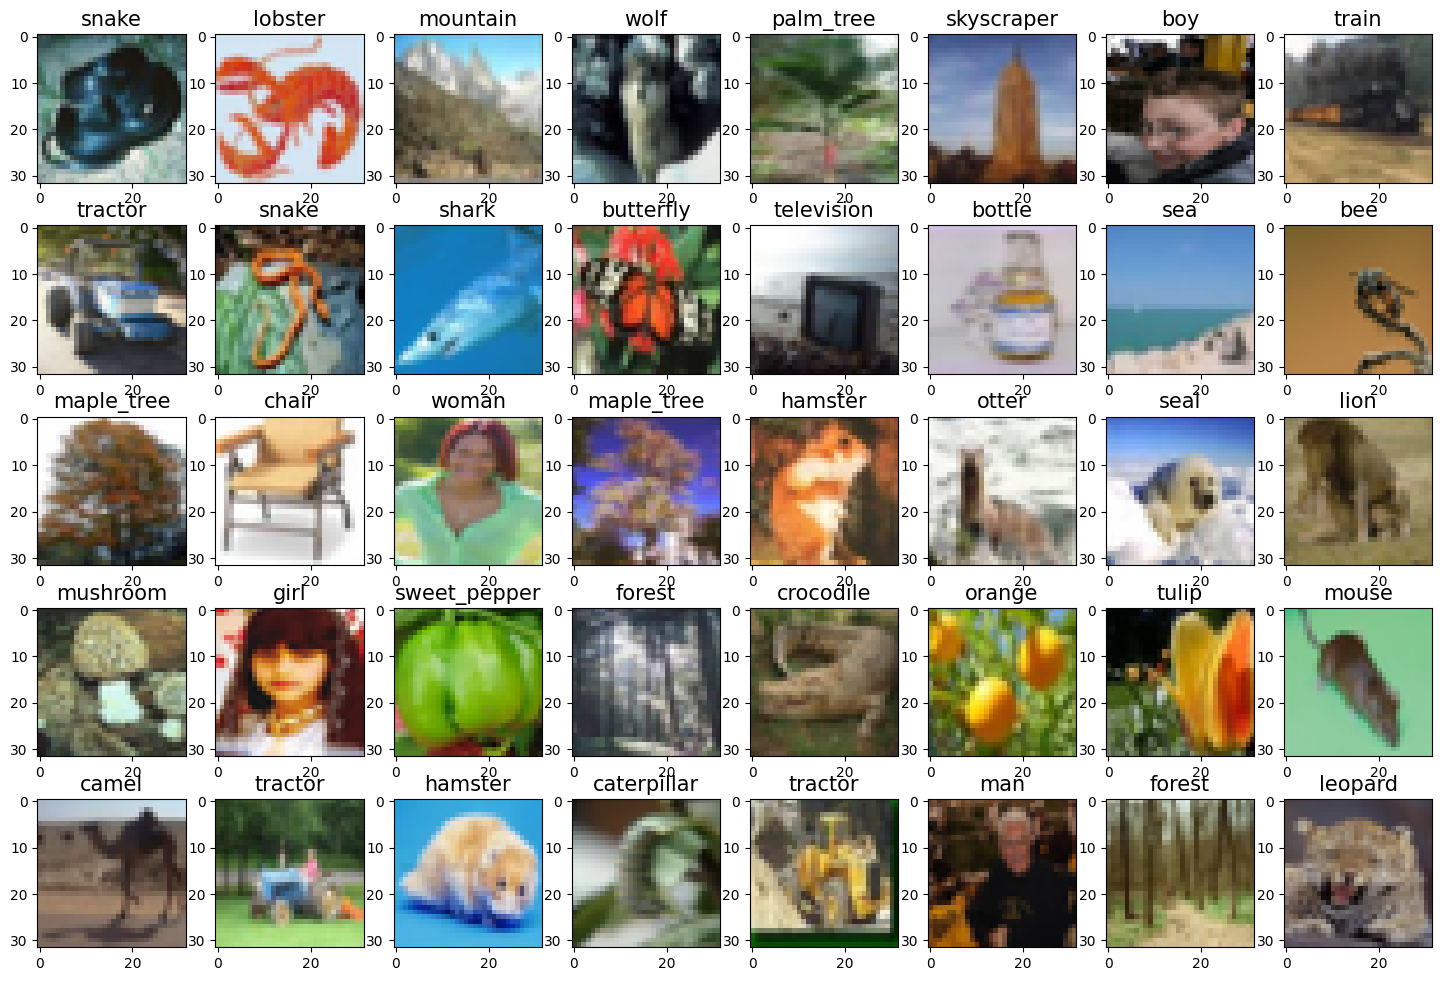

In [26]:
pos = 0
fig = plt.figure(figsize=(18,12))
for image in range(40,80):
  fig.add_subplot(5,8,pos+1)
  plt.imshow(train_dataset.data[image])
  plt.title(classes[train_dataset.targets[image]], fontsize = 15)
  pos += 1

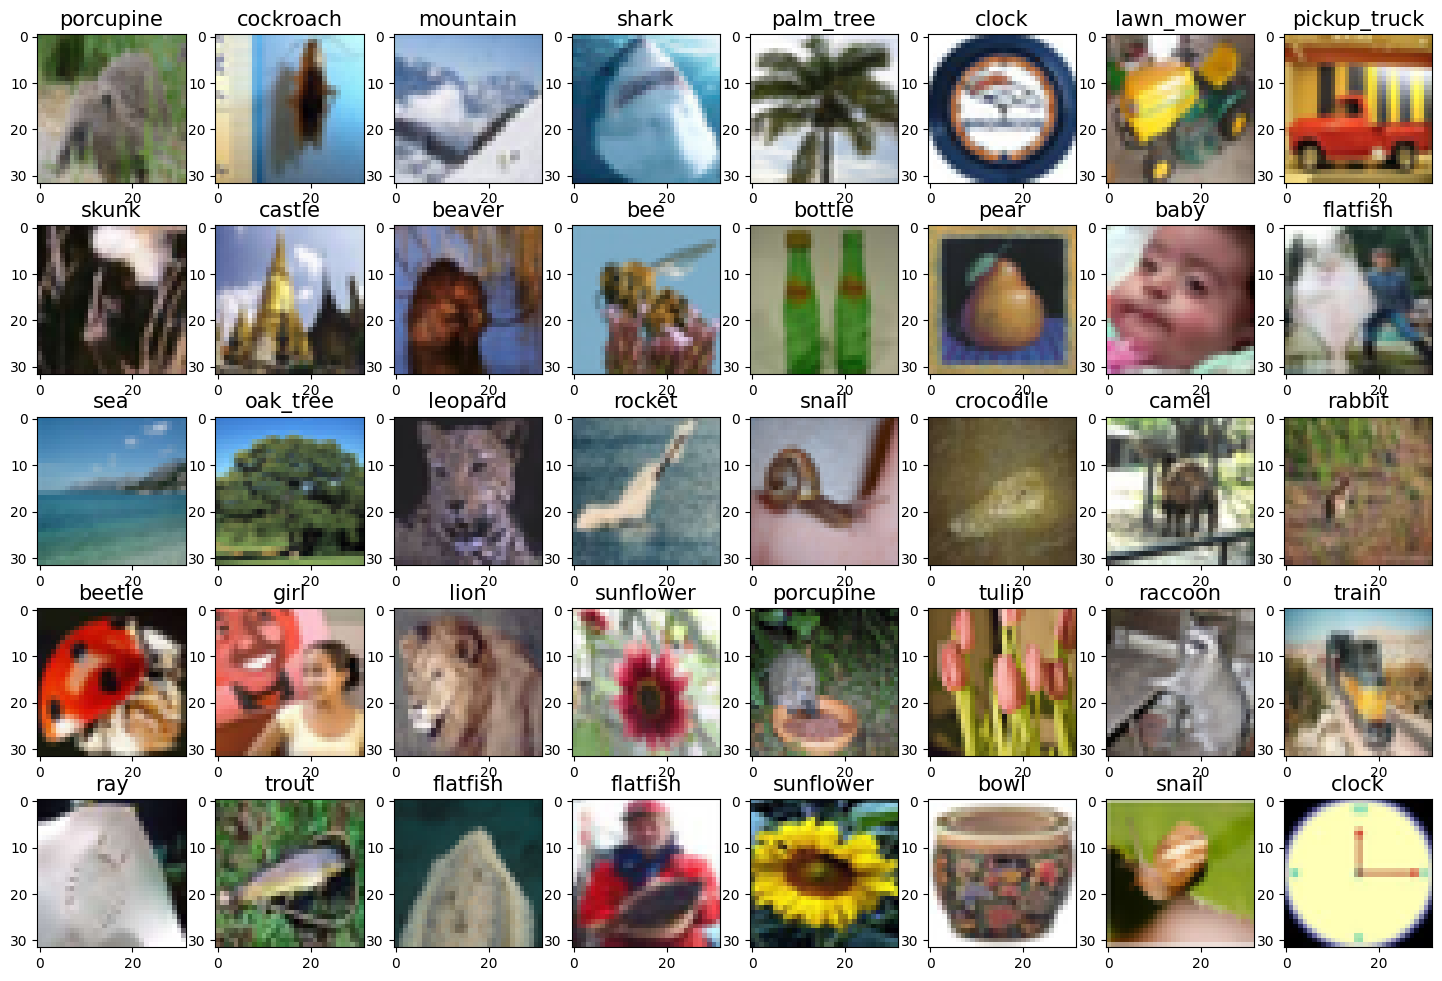

In [27]:
pos = 0
fig = plt.figure(figsize=(18,12))
for image in range(40,80):
  fig.add_subplot(5,8,pos+1)
  plt.imshow(test_dataset.data[image])
  plt.title(classes[test_dataset.targets[image]], fontsize = 15)
  pos += 1

In [28]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = False)
print(len(train_dataloader))
print(len(test_dataloader))

1563
313


In [63]:
for param in model.parameters():
  param.requires_grad = False

model.classifier = nn.Sequential()
model.classifier.add_module("drop1", nn.Dropout(p = 0.4, inplace = True))
model.classifier.add_module("linr1", nn.Linear(in_features = 1280, out_features = 1000))
model.classifier.add_module("drop2", nn.Dropout(p = 0.4, inplace = True))
model.classifier.add_module("linr2", nn.Linear(in_features = 1000, out_features = 100))

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
model_ops.train(model = model,
                train_dataloader = train_dataloader,
                test_dataloader = test_dataloader,
                loss_function = criterion,
                optimizer = optimizer,
                metric = "accuracy",
                epochs = 15,
                device = device,
                verbose = 2)

Training:   0%|          | 0/15 [00:00<?, ?it/s]